# ***Spectral Response Determination and Quantum Efficiency of a Solar Cell***  
  
The external quantum efficiency of a *Si* solar cell was obtained using an optic system and, from that efficiency, its spectral response was calculated.  
The energy gap obtained from the derivative method was of $1.15$ $eV$ and $1.14$ $eV$ through the graph of $[ln(1-EQE)]^{2}$ $vs$ $h\nu$.  
  
The measurements were taken from a wavelength of $300$ $nm$ to $1100$ $nm$ at intervals of $5$ $nm$. First, the electric response of a reference sensor was measured. Then, this response and the spectral one given by the manufacturer were loaded to the software $TracQ_{BASIC}$ and the incident radiation power was calculated. Finally, the quantum efficiency of the Si solar cell was measured through the software.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.signal import savgol_filter
from scipy.stats import linregress

## Loading data

In [2]:
df = pd.read_csv(
    "practice_3.txt",
    sep="\t",
    on_bad_lines="skip",
    header=0,
    skiprows=9,
    names=["Wavelength (nm)", "IRP", "EQE (%)"]
)
df

,Wavelength (nm),IRP,EQE (%)
0,300.017,0.03528,58.06996
1,301.992,0.03723,59.40507
2,304.005,0.03961,60.75801
3,306.016,0.04175,62.07649
4,307.991,0.04382,63.10497
...,...,...,...
396,1092.006,0.03803,22.21079
397,1094.003,0.03003,20.50270
398,1095.998,0.02643,18.87539
399,1097.989,0.02454,17.46431


Since we only want the columns of `Wavelength (nm)` and `EQE (%)`, we will drop the column of `IRP` (Incident Radiation Power).

In [3]:
df.drop(columns=["IRP"], inplace=True)
df

,Wavelength (nm),EQE (%)
0,300.017,58.06996
1,301.992,59.40507
2,304.005,60.75801
3,306.016,62.07649
4,307.991,63.10497
...,...,...
396,1092.006,22.21079
397,1094.003,20.50270
398,1095.998,18.87539
399,1097.989,17.46431


## Quantum Efficiency (QE)

It is defined as the reason between the number of electrons prodced by an incident photon of a determined wavelength. From this, we have two efficiencies: external and internal. Both are distinguished by the way in which photons interact with the surface of the cell.  
  
The *internal quantum efficiency* *(EQI)* is the number of recollected electrons by number of photons absorbed in the solar cell and it considers the reflectance of the surface. It is given by:  
  
$EQI=\frac{\eta_{e}}{\eta_{p}}$     (1)  
  
where $\eta_{e}$ is the number of electrons produced and $\eta_{p}$ is the number of photons absorbed.  
  
The external quantum efficiency (EQE) is the number of recollected electrons by each photon that incises on the solar cell and it doesn't consider the reflectance of the surface. It is given by:  
  
$EQE=\frac{Ih\nu}{Pq}$     (2)   
  
where I is the measured current and P is the power of a laser. Furthermore, it can be approximated to:  
  
$EQE\approx1-\frac{e^{\alpha(\lambda)W(V)}}{\alpha(\lambda)L+1}$     (3)  
  
where $\alpha(\lambda)$ its the absorption coefficient, $W(V)$ is the width of the space charge region and $L$ is the difussion length of minority carriers. If $L$ is less than the distance in which the photons are absorbed, then:  
  
$(\alpha(\lambda)W(V))^{2}=[ln(1-EQE)]^{2}$     (4)  
  
From (4), for direct transitions we'll have:  
    
$[ln(1-EQE)]^{2}\propto(h\nu-E_{g})$     (5)  
  
From (5), $[ln(1-EQE)]^{2}$ is a linear function of $h\nu$ and, with an adjustment, the energy gap $E_{g}$ can be calculated with the intercept for $h\nu=0$.  
  
Both types of efficiency are related by:  
  
$EQE(\lambda)=[1-R(\lambda)]EQI(\lambda)$     (6)
  
where $R(\lambda)$ is the reflectance and with the efficiencies, are in fucntion of the wavelength $\lambda$. In this way, the *EQI* can be directly calculated if the *EQE* and number of photons ar ealready known.

### EQE of a *Si* solar cell

To ease the data analysis, a Savitzky-Golay smoothing at 10 points was done to the original curve.

In [4]:
svg_eqe = savgol_filter(x=df["EQE (%)"], window_length=10, polyorder=2)
# Adding this numpy array to df
df["EQE (%) smoothed"] = svg_eqe.tolist()
df.head()

,Wavelength (nm),EQE (%),EQE (%) smoothed
0,300.017,58.06996,58.459183
1,301.992,59.40507,59.257436
2,304.005,60.75801,60.320764
3,306.016,62.07649,61.649170
4,307.991,63.10497,63.242652


Using seaborn to see this response:

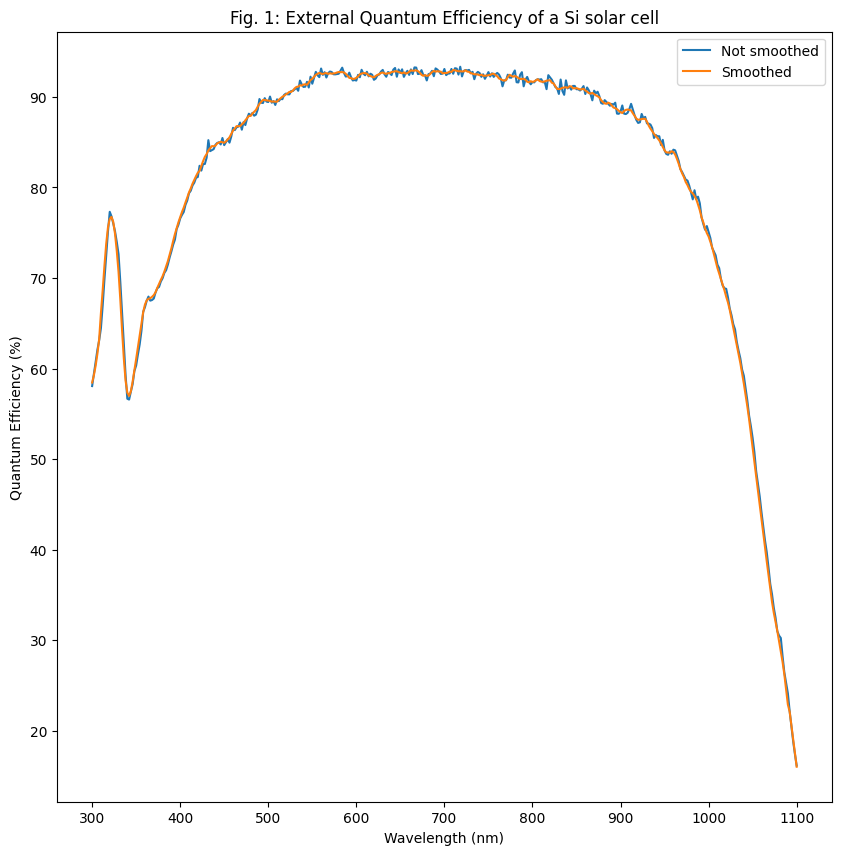

In [5]:
# We'll use seaborn to plot both lines
fig1, ax = plt.subplots(figsize=(10, 10))
df_cols = ["EQE (%)", "EQE (%) smoothed"]
for column in df_cols:
    if column == "EQE (%)":
        label = "Not smoothed"
    else:
        label = "Smoothed"
    sns.lineplot(data=df, x="Wavelength (nm)", y=column, label=label)
ax.set(
    title="Fig. 1: External Quantum Efficiency of a Si solar cell",
    ylabel="Quantum Efficiency (%)"
)
plt.show()


#### Using pandas to find a maximum and minimum in EQE in Fig. 1

In [6]:
eqe_max = df.loc[df["EQE (%) smoothed"] == df["EQE (%) smoothed"].max()]
eqe_max

,Wavelength (nm),EQE (%),EQE (%) smoothed
205,710.013,92.5443,92.955741


We see that a maximum in the *EQE* happens at a wavelength of $710$ $nm$ with $92.96$%.  
  
Besides, there's a big decrease in the *EQE* around $950$ $nm$. This happens beacuse of reflectance or trasmission phenomena. We can also watch that there is not absorption of photons from $1100$ $nm$.  
  
Let's check the energy when photons aren't absorbed anymore with:  
  
$E=\frac{hc}{\lambda}$     (7)

First, we will verify that photons aren't abosrbed at $1100$ $nm$:

In [7]:
df_min = df.loc[df["EQE (%) smoothed"] == df["EQE (%) smoothed"].min()]
df_min

,Wavelength (nm),EQE (%),EQE (%) smoothed
400,1100.006,16.17466,16.048673


Then, using (7):

In [8]:
# Remember that hc=1240 eV * nm
oe_gap = round(1240 / (df_min["Wavelength (nm)"]).values[0], 2)
print(f"E_g={oe_gap} eV")

E_g=1.13 eV


We obtain an energy gap of $1.13$ $eV$. This energy corresponds to the energy gap of *Si*.

#### Using Plotly to find maximum and minimum in EQE

In [9]:
fig_1_1 = px.line(
    df,
    x="Wavelength (nm)",
    y=df.columns[1:3],
    markers=True,
    title="Fig. 1.1: External Quantum Efficiency of a Si solar cell (Plotly)"
)

fig_1_1.update_layout(title_x=0.5, yaxis_title="EQE (%)", legend_title=None)
fig_1_1.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_1_1.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_1_1_names = {"EQE (%)": "Not smoothed", "EQE (%) smoothed": "Smoothed"}
fig_1_1.for_each_trace(lambda t: t.update(name = fig_1_1_names[t.name]))
fig_1_1.show()

In this plot we just have to zoom in the part where the wavelength goes from $500$ $nm$ to $850$ $nm$ and turn off the curve of *EQE (%)* to find the maximum *EQE*.  
We find that the maximum is located at $710.01$ $nm$ with an *EQE* of $92.95$% and the minimum is located at $1100$ $nm$ with an *EQE* of $16.04$%.  
  
We see that we obtain the same results as if we were using pandas. So the energy gap is the same as before, $E_{g}=1.13$ $eV$.

## Spectral Response (RE)

It is defined as the photocurrent generated by the solar cell as function of incident photons in a wavelength interval and it is expressed in $\frac{A}{W}$. This answer is:  
  
$RE(\lambda)=\frac{qQE(\lambda)[1-R(\lambda)]}{h\nu}$     (8)  
  
The *EQI* can be calculated with the previous answer:  
  
$EQI(\lambda)=\frac{h\nu}{q[1-R(\lambda)]}RE(\lambda)$     (9)  
  
Through (9), *EQE* can be calculated by replacing in (6):  
  
$EQE(\lambda)=\frac{hc}{q\lambda}RE(\lambda)$     (10)  
  
The answer of the system must be considerated in the measurement of *RE*, because the incident radiation will vary with the wavelength.

### Spectral Response calculation through EQE

First, we will express the content of the columns corresponding to *EQE* as decimal numbers and them as new columns :

In [10]:
df["EQE (%) dec"] = df["EQE (%)"] / 100
df["EQE (%) smoothed dec"] = df["EQE (%) smoothed"] / 100
df.head(5)

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec
0,300.017,58.06996,58.459183,0.580700,0.584592
1,301.992,59.40507,59.257436,0.594051,0.592574
2,304.005,60.75801,60.320764,0.607580,0.603208
3,306.016,62.07649,61.649170,0.620765,0.616492
4,307.991,63.10497,63.242652,0.631050,0.632427


Now, we can proceed to calculate the spectral response with (10):

In [11]:
df["RE (A/W)"] = (df["Wavelength (nm)"] * df["EQE (%) dec"]) / 1240
df["RE (A/W) smoothed"] = (df["Wavelength (nm)"] * df["EQE (%) smoothed dec"]) / 1240
df.head(5)

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed
0,300.017,58.06996,58.459183,0.580700,0.584592,0.140500,0.141442
1,301.992,59.40507,59.257436,0.594051,0.592574,0.144676,0.144317
2,304.005,60.75801,60.320764,0.607580,0.603208,0.148958,0.147886
3,306.016,62.07649,61.649170,0.620765,0.616492,0.153197,0.152142
4,307.991,63.10497,63.242652,0.631050,0.632427,0.156740,0.157082


Now we'll plot this response with seaborn:

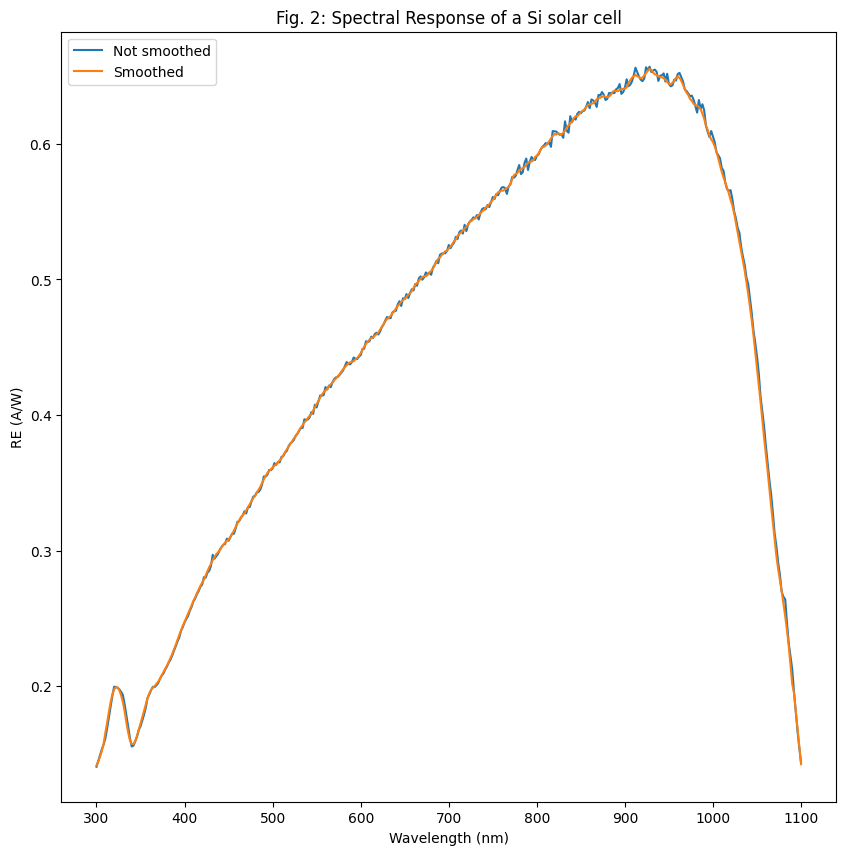

In [12]:
fig2, ax = plt.subplots(figsize=(10, 10))
resp_cols = ["RE (A/W)", "RE (A/W) smoothed"]
for column in resp_cols:
    if column == "RE (A/W)":
        label = "Not smoothed"
    else:
        label = "Smoothed"
    sns.lineplot(data=df, x="Wavelength (nm)", y=column, label=label)
ax.set(title="Fig. 2: Spectral Response of a Si solar cell")
plt.show()

We see that there's an increase and a decrease between $300$ $nm$ and $342$ $nm$, from this point there is another increase.

#### Obtaining maximum spectral response with pandas

To find the maximum spectral response:

In [13]:
max_spr = df.loc[df["RE (A/W) smoothed"] == df["RE (A/W) smoothed"].max()]
max_spr[["Wavelength (nm)", "RE (A/W)", "RE (A/W) smoothed"]]

,Wavelength (nm),RE (A/W),RE (A/W) smoothed
314,927.99,0.656953,0.65536


We see that the maximum of this spectral response is located at $928$ $nm$ with $0.66$ $\frac{A}{W}$. And from here there's a decrease in the photocurrent until it is not produced anymore at $1100$ $nm$. This is related to the fact that photons aren't absorbed at this wavelength.

#### Obtaining maximum spectral response with Plotly

In [14]:
fig_2_1 = px.line(
    df,
    x="Wavelength (nm)",
    y=df.columns[5:7],
    markers=True,
    title="Fig. 2.1: Spectral Response of a Si solar cell (Plotly)"
)

fig_2_1.update_layout(title_x=0.5, yaxis_title="RE (A/W)", legend_title=None)
fig_2_1.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_2_1.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_2_1_names = {"RE (A/W)": "Not smoothed", "RE (A/W) smoothed": "Smoothed"}
fig_2_1.for_each_trace(lambda t: t.update(name = fig_2_1_names[t.name]))
fig_2_1.show()

To find the maxmimum and minimum response with Plotly, we just have to zoom in the plot between $900$ $nm$ and $1100$ $nm$. Once we do this, we see that the maximum response is located at $928$ $nm$ with $0.66$ $\frac{A}{W}$ and photons are not absorbed anymore at $1100$ $nm$.

## Calculating energy gap ($E_{g}$)

### Derivative method

Since it is not possible to absorb photons with an energy less than the energy gap, we will only consider the interval from $1000$ $nm$ to $1100$ $nm$. In this interval the photons will have energies closer to the energy gap, as we can see in *Fig 2* or *Fig 2.1*. Then the nearest maximum to $1100$ $nm$ will be the energy gap $E_{g}$.  

Let's apply the derivative method to the *EQE* and the smoothed *EQE* and add these new values to the dataframe: 

In [15]:
w = df["Wavelength (nm)"].to_numpy()
eqe_wos = df["EQE (%)"].to_numpy()
eqe_dev = np.diff(eqe_wos, prepend=eqe_wos[1]) / np.diff(w, prepend=w[1])

seqe_dev = savgol_filter(
    df["EQE (%) smoothed"],
    window_length=10,
    polyorder=2,
    deriv=1,
    delta=w[1]-w[0]
)

eqe_cols = ["EQE (%)", "EQE (%) smoothed"]
for qe in eqe_cols:
    if qe == "EQE (%)":
        df["dEQE (a. u.)"] = eqe_dev.tolist()
    else:
        df["dEQE smoothed (a. u.)"] = seqe_dev.tolist()

df.head()

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed,dEQE (a. u.),dEQE smoothed (a. u.)
0,300.017,58.06996,58.459183,0.580700,0.584592,0.140500,0.141442,0.676005,0.504208
1,301.992,59.40507,59.257436,0.594051,0.592574,0.144676,0.144317,0.676005,0.620366
2,304.005,60.75801,60.320764,0.607580,0.603208,0.148958,0.147886,0.672101,0.736523
3,306.016,62.07649,61.649170,0.620765,0.616492,0.153197,0.152142,0.655634,0.852681
4,307.991,63.10497,63.242652,0.631050,0.632427,0.156740,0.157082,0.520749,0.968839


Plotting these new columns:

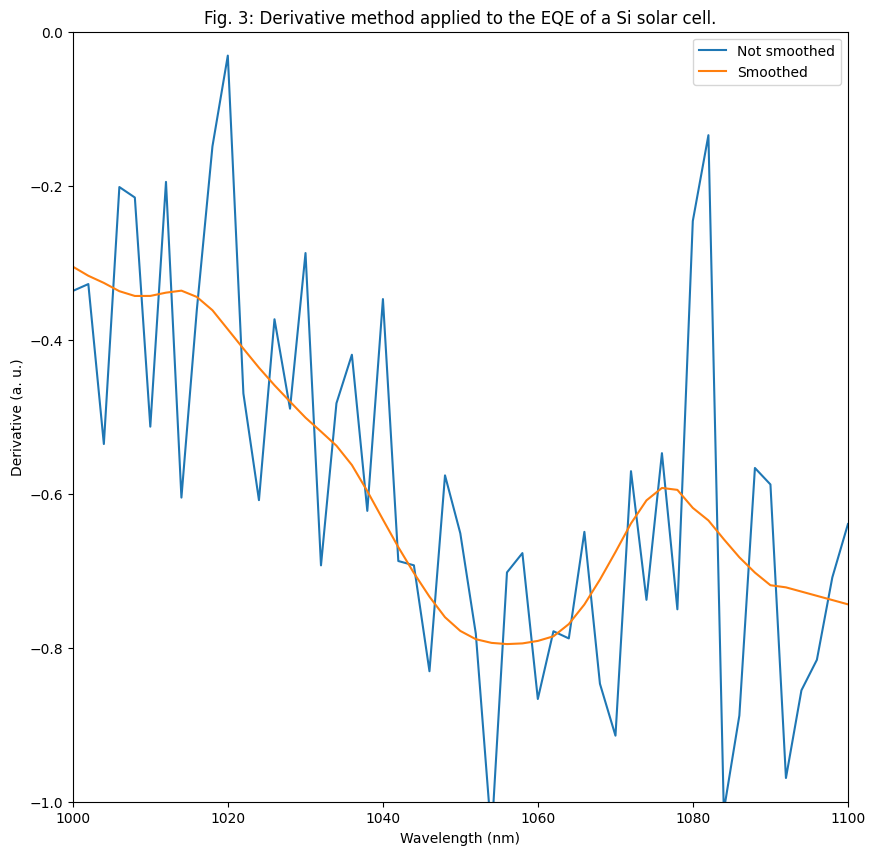

In [16]:
fig3, ax = plt.subplots(figsize=(10, 10))
diff_eqe_cols = ["dEQE (a. u.)", "dEQE smoothed (a. u.)"]

for diff_qe in diff_eqe_cols:
    if diff_qe == "dEQE (a. u.)":
        label = "Not smoothed"
    else:
        label = "Smoothed"
    sns.lineplot(data=df, x="Wavelength (nm)", y=diff_qe, label=label)

ax.set(
    title="Fig. 3: Derivative method applied to the EQE of a Si solar cell.",
    ylabel="Derivative (a. u.)"
)
plt.xlim(1000, 1100)
plt.ylim(-1, 0)
plt.show()

Let's focus on the wavelengths between $1060$ $nm$ and $1100$ $nm$, since we can see a maximum in that interval:

In [17]:
n1100 = df.loc[
    (df["Wavelength (nm)"] >= 1060) |
    (df["Wavelength (nm)"] >= 1100)
]

n1100

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed,dEQE (a. u.),dEQE smoothed (a. u.)
381,1062.005,42.61996,41.914557,0.426200,0.419146,0.365021,0.358980,-0.778605,-0.785187
382,1063.989,41.05670,40.327336,0.410567,0.403273,0.352289,0.346031,-0.787933,-0.769290
383,1065.998,39.75184,38.731173,0.397518,0.387312,0.341737,0.332963,-0.649507,-0.743857
384,1068.005,38.05230,37.245628,0.380523,0.372456,0.327742,0.320794,-0.846806,-0.711544
385,1070.009,36.22019,35.712260,0.362202,0.357123,0.312548,0.308165,-0.914227,-0.675755
386,1072.011,35.07762,34.230893,0.350776,0.342309,0.303255,0.295935,-0.570714,-0.638554
387,1074.009,33.60352,33.053781,0.336035,0.330538,0.291052,0.286291,-0.737788,-0.608629
388,1076.004,32.51160,32.066648,0.325116,0.320666,0.282118,0.278257,-0.547328,-0.592493
389,1077.997,31.01661,31.049254,0.310166,0.310493,0.269644,0.269927,-0.750120,-0.594992
390,1079.987,30.52733,29.927258,0.305273,0.299273,0.265880,0.260654,-0.245869,-0.618402


#### Using pandas to find the nearest maximum to $1100$ $nm$

Now, let's find this maximum:

In [18]:
nwave_1100 = n1100[
    n1100["dEQE smoothed (a. u.)"] == n1100["dEQE smoothed (a. u.)"].max()
]
nwave_1100

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed,dEQE (a. u.),dEQE smoothed (a. u.)
388,1076.004,32.5116,32.066648,0.325116,0.320666,0.282118,0.278257,-0.547328,-0.592493


We find that the nearest maximum to $1100$ $nm$ is located at $1076$ $nm$. So using (7):

In [19]:
Eg_diff = 1240 / nwave_1100["Wavelength (nm)"].values[0]
Eg_dm = f"Energy gap by derivative method: {Eg_diff} ev"
print(Eg_dm)

Energy gap by derivative method: 1.1524120728175733 ev


The energy gap obtained through the derivative method was of $E_{g}=1.15$ $eV$.  
This result corresponds to the energy gap of *Si*.

#### Using Plotly to find the nearest maximum to $1100$ $nm$

Since we will use Plotly, we can use the dataframe *n1100* that considers the wavelengths from $1060$ $nm$ to $1100$ $nm$ or we can or use the original dataframe *df* and just zoom in the interval previously mentioned.  
  
In this case, we will use the dataframe *n1100*.

In [20]:
fig_3_1 = px.line(
    n1100,
    x="Wavelength (nm)",
    y=["dEQE (a. u.)", "dEQE smoothed (a. u.)"],
    markers=True,
    title="Fig. 3.1: Derivative method applied to the EQE of a Si solar cell (Plotly)"
)

fig_3_1.update_layout(
    title_x=0.5, yaxis_title="Derivative (a. u.)", legend_title=None)
fig_3_1.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_3_1.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_3_1_names = {"dEQE (a. u.)": "Not smoothed", "dEQE smoothed (a. u.)": "Smoothed"}
fig_3_1.for_each_trace(lambda t: t.update(name = fig_3_1_names[t.name]))
fig_3_1.show()

As we can see in Fig 3.1, the nearest maximum to $1100$ $nm$ is at $1076$ $nm$. And using (7) we obtain an energy of $1.15$ $eV$.

### Plot of $[ln(1-EQE)]^{2}$ $vs.$ $h{\nu}$

We will build the plot of $[ln(1-EQE)]^{2}$ $vs.$ $h\nu$. For this, we will add a new column named *Energy (eV)*, this column will contain the results of (7), i. e., the energies of the considered wavelengths in the experiment. Then:

In [21]:
# Adding column "Energy" to df
df["Energy (eV)"] = 1240 / df["Wavelength (nm)"]
df.head()

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed,dEQE (a. u.),dEQE smoothed (a. u.),Energy (eV)
0,300.017,58.06996,58.459183,0.580700,0.584592,0.140500,0.141442,0.676005,0.504208,4.133099
1,301.992,59.40507,59.257436,0.594051,0.592574,0.144676,0.144317,0.676005,0.620366,4.106069
2,304.005,60.75801,60.320764,0.607580,0.603208,0.148958,0.147886,0.672101,0.736523,4.078880
3,306.016,62.07649,61.649170,0.620765,0.616492,0.153197,0.152142,0.655634,0.852681,4.052076
4,307.991,63.10497,63.242652,0.631050,0.632427,0.156740,0.157082,0.520749,0.968839,4.026092


Now we will add two more columns called $[ln(1-EQE)]^{2}$ and $[ln(1-EQE)]^{2}$ $smoothed$:

In [22]:
# Creating the contents of each column
ln_1_EQE_2 = np.log(1-df["EQE (%) dec"]) ** 2
s_ln_1_EQE_2 = np.log(1-df["EQE (%) smoothed dec"]) ** 2

# Adding these contents to df
df["[ln(1-EQE)]^2"] = ln_1_EQE_2
df["[ln(1-EQE)]^2 smoothed"] = s_ln_1_EQE_2

df.head()

,Wavelength (nm),EQE (%),EQE (%) smoothed,EQE (%) dec,EQE (%) smoothed dec,RE (A/W),RE (A/W) smoothed,dEQE (a. u.),dEQE smoothed (a. u.),Energy (eV),[ln(1-EQE)]^2,[ln(1-EQE)]^2 smoothed
0,300.017,58.06996,58.459183,0.580700,0.584592,0.140500,0.141442,0.676005,0.504208,4.133099,0.755452,0.771751
1,301.992,59.40507,59.257436,0.594051,0.592574,0.144676,0.144317,0.676005,0.620366,4.106069,0.812751,0.806219
2,304.005,60.75801,60.320764,0.607580,0.603208,0.148958,0.147886,0.672101,0.736523,4.078880,0.875016,0.854408
3,306.016,62.07649,61.649170,0.620765,0.616492,0.153197,0.152142,0.655634,0.852681,4.052076,0.940122,0.918519
4,307.991,63.10497,63.242652,0.631050,0.632427,0.156740,0.157082,0.520749,0.968839,4.026092,0.994195,1.001665


Let's plot hese three new columns:

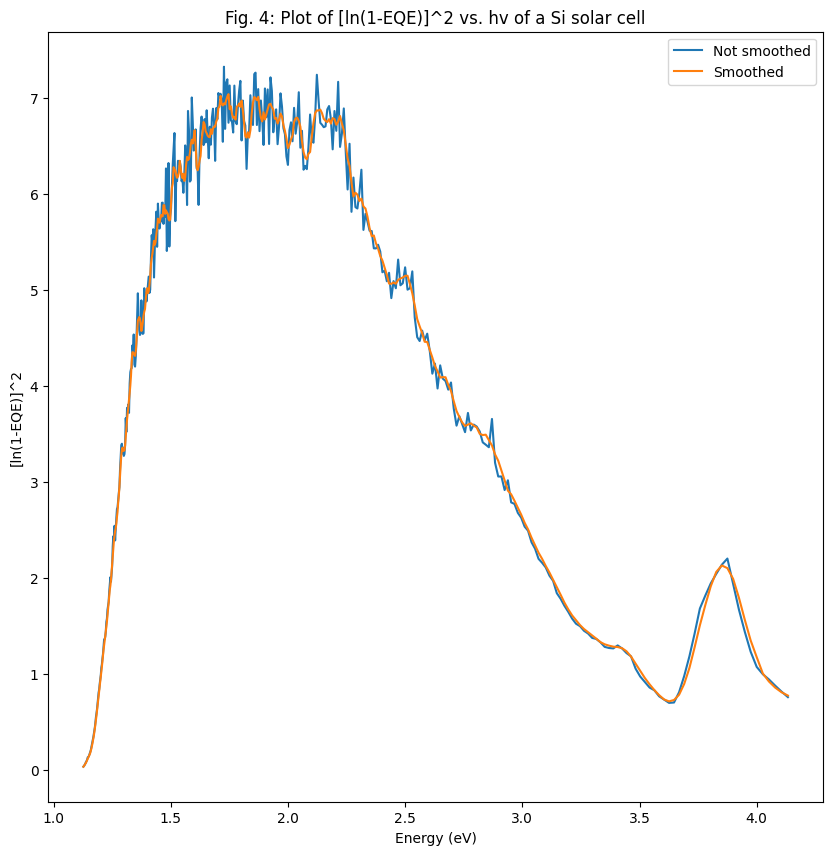

In [23]:
fig4, ax = plt.subplots(figsize=(10, 10))
log_eqe = ["[ln(1-EQE)]^2", "[ln(1-EQE)]^2 smoothed"]
for log in log_eqe:
    if log == log_eqe[0]:
        label = "Not smoothed"
    else:
        label = "Smoothed"
    sns.lineplot(data=df, x="Energy (eV)", y=log, label=label)
ax.set(title="Fig. 4: Plot of [ln(1-EQE)]^2 vs. hv of a Si solar cell")
plt.show()

From fig. 4 and considered the smoothed curve, we can see a linear behaviour around $1$ $eV$ and $1.5$ $eV$. To select a more accurate range of energies, we will use Plotly:

In [24]:
fig_4_1 = px.line(
    df,
    x="Energy (eV)",
    y=log_eqe,
    markers=True,
    title="Fig. 4.1: Plot of [ln(1-EQE)]^2 vs. hv of a Si solar cell (Plotly)"
)

fig_4_1.update_layout(title_x=0.5, yaxis_title="[ln(1-EQE)]^2", legend_title=None)
fig_4_1.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_4_1.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_4_1_names = {log_eqe[0]: "Not smoothed", log_eqe[1]: "Smoothed"}
fig_4_1.for_each_trace(lambda t: t.update(name = fig_4_1_names[t.name]))
fig_4_1.show()

Fig. 4.1 in the smoothed curve (red), shows us that we can choose energies less than $1.37$ $eV$. With this interval of energies, we will do an adjustment to find the energy gap ($E_{g}$). So:

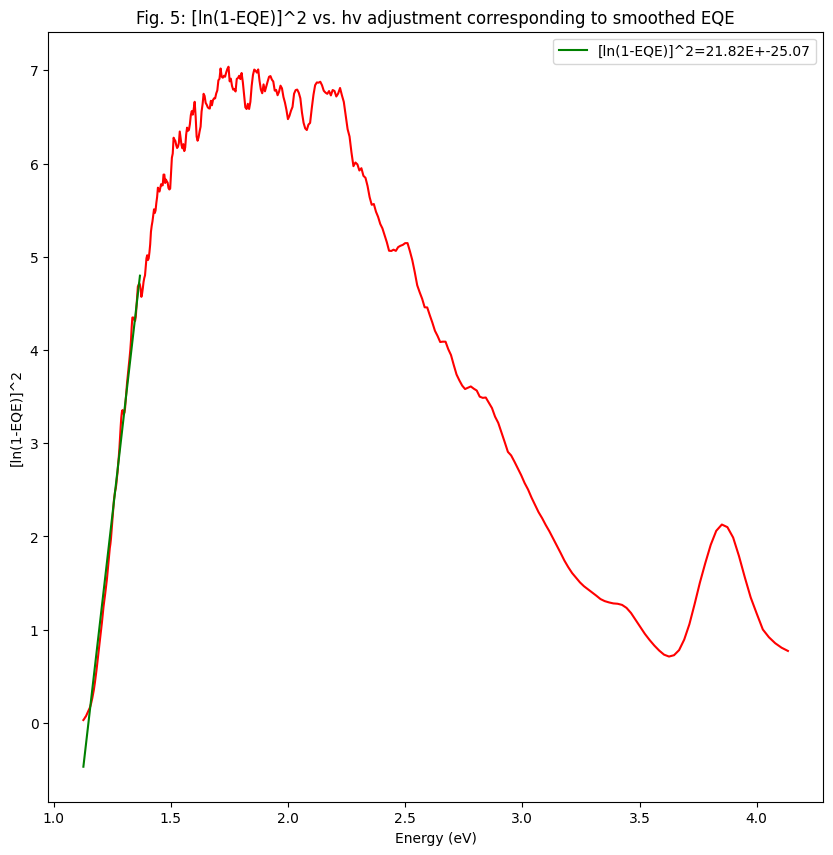

In [25]:
slope, inter, r, p, se = linregress(
    x=df[df["Energy (eV)"] < 1.37]["Energy (eV)"],
    y=df[df["Energy (eV)"] < 1.37][log_eqe[1]]
)

fig5, ax = plt.subplots(figsize=(10, 10))

not_ad_log = sns.lineplot(
    data=df,
    x=df["Energy (eV)"],
    y=df["[ln(1-EQE)]^2 smoothed"],
    color="red"
)

ad_log = sns.lineplot(
    data=df,
    x=df[df["Energy (eV)"] < 1.37]["Energy (eV)"],
    y=slope * df[df["Energy (eV)"] < 1.37]["Energy (eV)"] + inter,
    color="green",
    label=f"[ln(1-EQE)]^2={round(slope, 2)}E+{round(inter, 2)}"
)

ax.set(
    title="Fig. 5: [ln(1-EQE)]^2 vs. hv adjustment corresponding to smoothed EQE",
    ylabel="[ln(1-EQE)]^2"
)
plt.show()


Now that we have the adjustment equation, it will be enough to make it equal to zero to obtain the energy gap: 

In [26]:
# [ln(1-EQE)]^2=0 -> 0=21.82E - 25.07
log_en = (-inter) / slope
log_E_g = f"Energy gap by [ln(1-EQE)]^2 vs. hv plot: {log_en}"
print(log_E_g)

Energy gap by [ln(1-EQE)]^2 vs. hv plot: 1.148817862847654


Throurh Fig. 5 we obtain an energy gap of $E_{g}=1.14$ $eV$.

## Conclusions

The external quantum efficiency and the spectral response indicate the material effectiveness to absorb photons and transform them in electron-hole pairs and they are affected by its characteristics. The spectral response of the Si solar cell that we worked with, reaches a maximum of $0.65$ $\frac{A}{W}$ at $930$ $nm$, having a decrease subsequently. The photons with a wavelength greater than $1100$ $nm$ won't be used to produce energy. The energy gap obtained by the linear adjustment is lower than the calculated by the derivative method. An energy gap of $1.14$ $eV$ is obtained the adjustment of the $[ln(1-EQE)]^{2}$ $vs.$ $h\nu$ plot and $1.15$ $eV$ with the derivative method, being the first one the most approximated to values reported by literature ($1.12$ $eV$ for Si). Those are the reasons why *Si* is used in many solar cells.